In [2]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [11]:
#Start training
!python -m rl_zoo3.train --algo a2c  --env PongNoFrameskip-v4

========== PongNoFrameskip-v4 ==========
Seed: 1497929686
Loading hyperparameters from: /home/akari9/anaconda3/envs/sb3/lib/python3.12/site-packages/rl_zoo3/hyperparams/a2c.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('ent_coef', 0.01),
             ('env_wrapper',
              ['stable_baselines3.common.atari_wrappers.AtariWrapper']),
             ('frame_stack', 4),
             ('n_envs', 16),
             ('n_timesteps', 10000000.0),
             ('policy', 'CnnPolicy'),
             ('policy_kwargs',
              'dict(optimizer_class=RMSpropTFLike, '
              'optimizer_kwargs=dict(eps=1e-5))'),
             ('vf_coef', 0.25)])
Using 16 environments
Creating test environment
A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Using cuda device
Log path: logs/a2c/PongNoFrameskip-

In [10]:
import pandas as pd
#Load the results
results = pd.read_csv('logs/a2c/PongNoFrameskip-v4_2/0.monitor.csv', skiprows=2, names=['r', 'l', 't'])
# Preview the loaded data
print(results.tail())

        r      l             t
385  19.0   6716  13512.943788
386  20.0   8340  13558.735385
387  14.0  10124  13622.084371
388  20.0   8630  13664.284713
389  17.0   9670  13726.275796


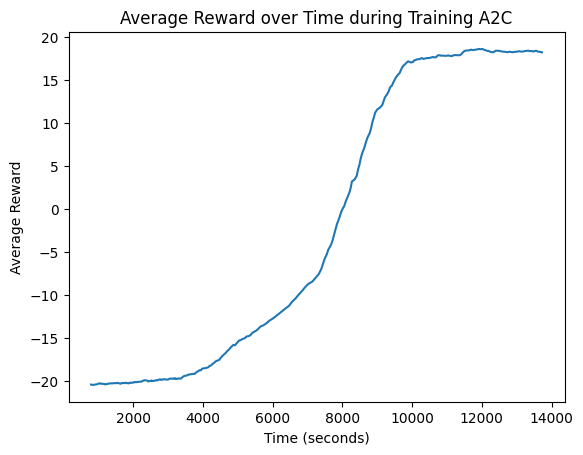

In [11]:
import matplotlib.pyplot as plt
# Compute a rolling mean with a window size of 50 for the reward
results['reward_mean'] = results['r'].rolling(window=50).mean()
# Plot the smoothed reward over time
plt.plot(results['t'], results['reward_mean'])
plt.xlabel('Time (seconds)')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time during Training A2C')
plt.show()

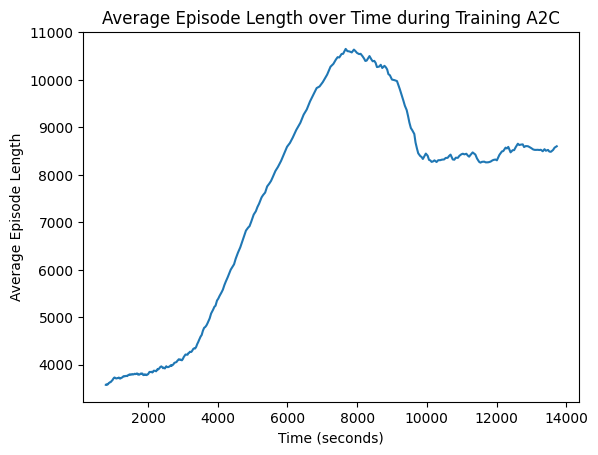

In [12]:
import matplotlib.pyplot as plt
# Compute a rolling mean with a window size of 50 for the episode length
results['episode_length'] = results['l'].rolling(window=50).mean()
# Plot the smoothed episode length over time
plt.plot(results['t'], results['episode_length'])
plt.xlabel('Time (seconds)')
plt.ylabel('Average Episode Length')
plt.title('Average Episode Length over Time during Training A2C')
plt.show()

In [30]:
#Evaluationg our trained agent over 1000 timesteps
!python -m rl_zoo3.enjoy  --algo a2c  --env PongNoFrameskip-v4  --no-render  --n-timesteps 10000  --folder logs/

Loading latest experiment, id=2
Loading logs/a2c/PongNoFrameskip-v4_2/PongNoFrameskip-v4.zip
A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
Stacking 4 frames
Atari Episode Score: 16.00
Atari Episode Length 10127
Atari Episode Score: 18.00
Atari Episode Length 8018
Atari Episode Score: 18.00
Atari Episode Length 9182
Atari Episode Score: 20.00
Atari Episode Length 8340
